## Devoir 9

 === Basic version 
   Elapsed time is 0.024567 seconds.
   T(L/2,L/2) =   0.215753 [K] after 800 steps 
 === Smart version 
   Elapsed time is 0.016457 seconds.
   T(L/2,L/2) =   0.215753 [K] after 800 steps 
   Differences between both implementations :  0.0000000e+00 


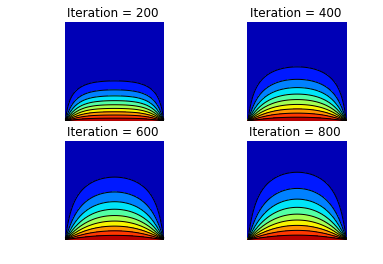

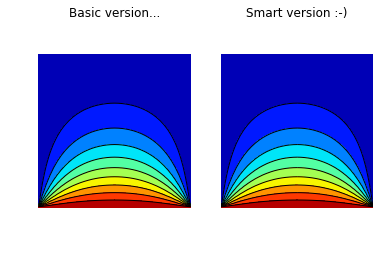

In [46]:
from numpy import *
from numpy.random import random
import matplotlib 
import matplotlib.pyplot as plt 
from timeit import default_timer as timer
 
def diffusion(T,beta,nt):
    for i in range(nt):
        short_T = T[1:-1,1:-1]
        T_ip1 = T[2:,1:-1]
        T_im1 = T[0:-2,1:-1]
        T_jp1 = T[1:-1,2:]
        T_jm1 = T[1:-1,:-2]
        T[1:-1,1:-1] = short_T + beta * (T_ip1 + T_im1 + T_jp1 + T_jm1 - 4* short_T)
    return T
 
# =========================================================================
 
 
def diffusionSmart(T,beta,nt):
    l,c = T.shape
    T_jm1 = empty((l-2,c-1))
    for i in range(nt):
        short_T = T[1:-1,:-1]
        T_ip1 = T[2:,:-1]
        T_im1 = T[0:-2,:-1]
        T_jp1 = T[1:-1,1:]
        T_jm1[:,1:] = T[1:-1,:-2]  #On utilise la symetry tq: T_jm1[0] = T_jm1[2]
        T_jm1[:,0] = T_jm1[:,2]
        T[1:-1,:-1] = short_T + beta * (T_ip1 + T_im1 + T_jp1 + T_jm1 - 4* short_T)
    return T


 
matplotlib.rcParams['toolbar'] = 'None'
myColorMap = matplotlib.cm.jet
 
#
# -1- Parametres physiques et numériques de la simulation
#     "factor" permet de raffiner dt et dx 
#
 
factor = 10
n = 4*factor; nMid = int((n)//2)
nt = 2*factor*factor
Trange = arange(0,1.1,0.1)
X,Y = meshgrid(linspace(-1,1,n+1),linspace(-1,1,n+1))
 
beta = 0.25
#beta = 0.2525    # Pour voir les instabilités :-)
 
#
# -2- Evolution temporelle
#
 
plt.figure("Thermal diffusion : beta = %6.4f" % beta)
T = zeros((n+1,n+1)); T[0,:] = 1
for i in range(4):
    plt.subplot(2,2,i+1)
    T = diffusion(T,beta,nt)
    plt.contourf(X,Y,T,Trange,cmap=myColorMap)
    plt.contour(X,Y,T,Trange,colors='k',linewidths=1)
    plt.axis("off"); plt.axis("equal")
    plt.title("Iteration = %d " % (nt*(i+1)))
  
 
#
# -Comparaison de l'implémentation de base
#  et du calcul restreint à une demi-domaine en tirant profit
#  de la symétrie :-)
#
 
plt.figure("Comparing both implementations !")
 
nt = 4*nt
T = zeros((n+1,n+1)); T[0,:] = 1
tic = timer(); T = diffusion(T,beta,nt)
print(' === Basic version \n   Elapsed time is %f seconds.' % (timer() - tic))
print('   T(L/2,L/2) = %10.6f [K] after %d steps ' % (T[nMid,nMid],nt))
Tbasic = T[nMid,nMid]
 
plt.subplot(1,2,1)
plt.contourf(X,Y,T,Trange,cmap=myColorMap)
plt.contour(X,Y,T,Trange,colors='k',linewidths=1)
plt.axis("off"); plt.axis("equal")
plt.title("Basic version...")
 
 
X,Y = meshgrid(linspace(0,1,nMid+1),linspace(-1,1,n+1))
T = zeros((n+1,nMid+1)); T[0,:] = 1
tic = timer(); T = diffusionSmart(T,beta,nt)
print(' === Smart version \n   Elapsed time is %f seconds.' % (timer() - tic))
print('   T(L/2,L/2) = %10.6f [K] after %d steps ' % (T[nMid,0],nt))
print('   Differences between both implementations : %14.7e ' % abs(Tbasic-T[nMid,0]))
 
plt.subplot(1,2,2)
plt.contourf(X,Y,T,Trange,cmap=myColorMap)
plt.contour(X,Y,T,Trange,colors='k',linewidths=1)
plt.contourf(-X,Y,T,Trange,cmap=myColorMap)
plt.contour(-X,Y,T,Trange,colors='k',linewidths=1)
plt.axis("off"); plt.axis("equal")
plt.title("Smart version :-)")
 
plt.show()
  